In [4]:
import requests
import pandas as pd
from lib_func import save_text_from_url
from io import StringIO

#Daily releases
url = 'https://www-app3.gfz-potsdam.de/kp_index/Kp_ap_Ap_SN_F107_since_1932.txt'
#File name
filename = 'solar.txt'

save_text_from_url(url, filename)
f = open('solar.txt', 'r')
data = f.read()
data_lines = data.split('\n')

instructions = data_lines[:39]
solar_data = data_lines[39:-1]
full_txt_data = ''
for l in solar_data:
    full_txt_data += l + "\n"
df = pd.read_csv(StringIO(full_txt_data), sep='\s+')
df['max_Kp'] = df[['Kp1', 'Kp2', 'Kp3', 'Kp4', 'Kp5', 'Kp6', 'Kp7', 'Kp8']].max(axis=1)
df.to_csv('historical_forecast.csv')

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dviab\AppData\Local\Temp\ipykernel_15780\1745217064.py:21: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(StringIO(full_txt_data), sep='\s+')


File saved as 'solar.txt'


In [5]:
idx = df.loc[df.max_Kp>8].index.to_list()
idx_new = []
for id in idx:
    idx_new = idx_new + list(range(id, id + 8))
df.iloc[idx_new[:-7]]

,#YYY,MM,DD,days,days_m,Bsr,dB,Kp1,Kp2,Kp3,...,ap5,ap6,ap7,ap8,Ap,SN,F10.7obs,F10.7adj,D,max_Kp
1942,1937,4,26,1942,1942.5,1424,8,5.667,4.667,3.333,...,7,48,111,236,67,262,-1.0,-1.0,2,8.333
1943,1937,4,27,1943,1943.5,1424,9,7.000,6.000,4.000,...,7,6,94,132,61,268,-1.0,-1.0,2,7.000
1944,1937,4,28,1944,1944.5,1424,10,7.000,8.000,8.000,...,111,111,48,56,128,248,-1.0,-1.0,2,8.000
1945,1937,4,29,1945,1945.5,1424,11,2.333,2.000,3.667,...,22,22,27,22,19,205,-1.0,-1.0,2,4.000
1946,1937,4,30,1946,1946.5,1424,12,3.333,4.000,3.333,...,18,15,22,22,21,157,-1.0,-1.0,2,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33890,2024,10,14,33890,33890.5,2607,15,0.667,0.667,1.333,...,3,3,9,22,6,136,181.9,180.9,1,3.667
33891,2024,10,15,33891,33891.5,2607,16,2.333,2.333,3.333,...,12,18,7,7,11,109,172.0,170.9,1,3.333
33892,2024,10,16,33892,33892.5,2607,17,1.667,2.667,3.000,...,12,15,15,12,13,119,167.7,166.6,1,3.000
33893,2024,10,17,33893,33893.5,2607,18,2.667,3.000,1.667,...,2,5,9,7,7,141,173.5,172.2,1,3.000


<Axes: xlabel='#YYY'>

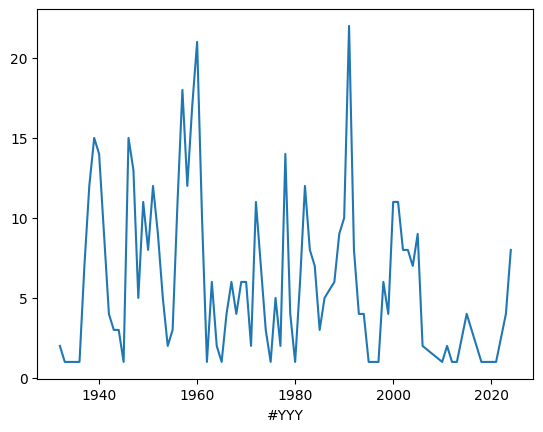

In [6]:
dflimit = df.loc[df.max_Kp>7]
(dflimit.groupby('#YYY')['max_Kp'].count()).plot()